In [1]:
import matplotlib.pyplot as plt
import numpy as np
from lowEBMs.Packages.Configuration import importer , add_sellersparameters, parameterinterpolatorstepwise, reset
from lowEBMs.Packages.Variables import variable_importer
from lowEBMs.Packages.RK4 import rk4alg, controlrun
from lowEBMs.Packages.ModelEquation import model_equation
from lowEBMs.Packages.Variables import Vars
#from lowEBMs.Packages.Functions import asd

In [2]:
configdic=importer('Development_config.ini')
variable_importer(configdic,True,accuracy_number=500,accuracy=0.08)
configdic1,paras=add_sellersparameters(configdic,parameterinterpolatorstepwise,'SellersParameterization.ini',2,0,True,True)
controldata=controlrun(configdic)
variable_importer(configdic,False)
eq=configdic1['eqparam']
rk=configdic1['rk4input']
fun=configdic1['funccomp']
Vars.T=controldata[1][-1]
print(Vars.T)
Vars.T_global=controldata[2][-1]
Vars.t=controldata[0][-1]
outputdata=rk4alg(model_equation,eq,fun)
out=[]
for l in outputdata:
    out.append(np.array(l))
    

Loading Configuration from: Development_config.ini
Starting controlrun with a temperature accuracy of 0.08 K on the GMT over 500 datapoints.
Loading Parameters from: /home/benni/anaconda3/lib/python3.6/site-packages/lowEBMs/Tutorials/Config/Data/SellersParameterization.ini
Starting simulation...
[260.61467228 265.76457135 270.67854785 275.20729309 279.21320344
 282.57456133 285.18923361 286.97777479 287.88584094 287.88584094
 286.97777479 285.18923361 282.57456133 279.21320344 275.20729309
 270.67854785 265.76457135 260.61467228]
Steady State reached after 1865 steps, within 2.676715135574341 seconds
Simulation finished within 2.6769461631774902 seconds
Finished controlrun over 5.109589041095891 years. Runtime: 2.6769959926605225 s
[247.003476   254.25888499 264.47214192 273.44527652 281.07286474
 287.11915434 291.3696496  293.53914781 294.27659134 294.57241179
 294.1142501  290.83835633 284.60830383 276.73926085 270.24254106
 264.19807532 258.49281695 254.9606866 ]
Starting simulation

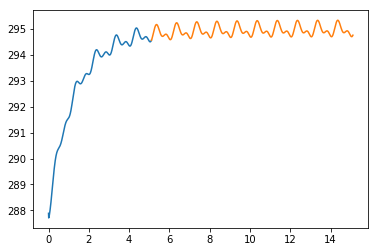

In [5]:
plt.plot(np.array(controldata[0])/(60*60*24*365),np.array(controldata[1])[:,9])
plt.plot(out[0]/(60*60*24*365),out[1][:,9])#[:,0])
#plt.ylim(-1,1)
#print(out[1][:,1])